In [2]:
import tensorflow as tf
import keras
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 

data = []
labels = []


shared_dir = '/Users/prateek/Desktop/ML/Major/augmented/'
infected_dir = shared_dir + 'True_parasitized/'
uninfected_dir = shared_dir + 'True_uninfected/'
input_shape = [32, 32]
batch = 32

def reading(path):
    mode = cv2.IMREAD_GRAYSCALE
    img_read = cv2.imread(path)#, mode)
    # img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)
    img_read = np.float32(img_read)
    img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2HSV_FULL)
    img_resize = cv2.resize(img_read, input_shape)
    return img_resize

parasitized_data = os.listdir(infected_dir)
uninfected_data = os.listdir(uninfected_dir)

max_i = 3
i = 0
for img in parasitized_data:
    i+= 1
    if i == max_i:
        break
    try:
        data.append(reading(infected_dir + img))
        labels.append(1)
    except Exception as e:
        print(e)
    
i = 0
for img in uninfected_data:
    i+= 1
    if i == max_i:
        break
    try:
        data.append(reading(uninfected_dir + img))
        labels.append(0)
    except Exception as e:
        print(e)

image_data = np.array(data)
labels = np.array(labels)
# input_shape.append(3)

print("image_shape:", input_shape)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_shape: [32, 32]
image_data: 4
labels: 4


(0.0, 0.32935431599617004, (0, 0), (31, 23))


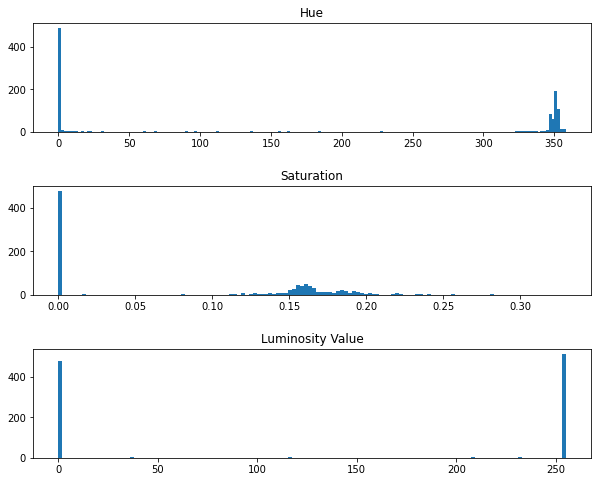

In [3]:
image = data[1]
H, S, V = image[:,:,0],image[:,:,1],image[:,:,2]
mm = cv2.minMaxLoc(S)
print(mm)

plt.figure(figsize=(10,8))
plt.subplot(311)                             #plot in the first cell
plt.subplots_adjust(hspace=.5)
plt.title("Hue")
plt.hist(np.ndarray.flatten(H), bins=180)
plt.subplot(312)                             #plot in the second cell
plt.title("Saturation")
plt.hist(np.ndarray.flatten(S), bins=128)
plt.subplot(313)                             #plot in the third cell
plt.title("Luminosity Value")
plt.hist(np.ndarray.flatten(V), bins=128)
plt.show()

In [4]:
bins = [i * 5 for i in range(0,36*2+1)]
print(bins)
histo = []
for image in image_data:
    histo.append(np.histogram(image, bins=bins))
data = np.array(histo)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360]


/var/folders/49/1qk_3w0x0_7_cg76ytz5l1hr0000gn/T/ipykernel_10954/3940665972.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(histo)


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.1,random_state = 0)

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(confusion_matrix( y_test, y_pred ))
print(accuracy_score(y_test, y_pred))
print( precision_score( y_test, y_pred, average='micro') )
print( recall_score( y_test, y_pred, average='micro') )

[[10148   635]
 [ 1306 13209]]
0.9232745671594592
0.9232745671594592
